## import libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

### prepare data


In [26]:
df = pd.read_csv("data/svm/data.csv",  header=None, names=[i for i in range(3)], index_col=False)

In [27]:
df = shuffle(df)
df.head()
#df_train.shape

,0,1,2
9,0.834,0.426,0
2,0.298,0.822,0
15,0.258,0.422,1
6,0.588,0.298,0
10,0.724,0.368,0


### exploratory

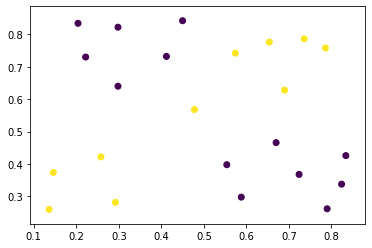

In [28]:
plt.scatter(df[0], df[1], c = df[2])

In [29]:
feature = df[[0, 1]]
target = df[2]

In [30]:
feature_train, feature_test, target_train, target_test = model_selection.train_test_split(feature, target, test_size=0.2)

In [31]:
from sklearn import svm
model = svm.SVC(kernel="rbf", gamma="scale")
#model = svm.SVC(kernel="linear")
model.fit(feature_train, target_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred_train = model.predict(feature_test)
print(accuracy_score(pred_train, target_test))
print(confusion_matrix(target_test, pred_train))

1.0
[[3 0]
 [0 2]]


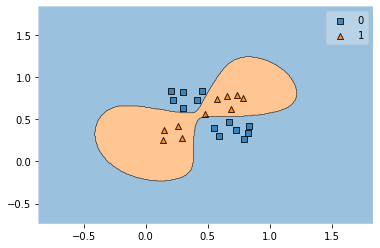

In [35]:
from mlxtend import plotting
plotting.plot_decision_regions(feature.to_numpy(), target.to_numpy(), clf=model)